### All days of the challange:

* [Day 1: Handling missing values](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)
* [Day 2: Scaling and normalization](https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data)
* [Day 3: Parsing dates](https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates/)
* [Day 4: Character encodings](https://www.kaggle.com/rtatman/data-cleaning-challenge-character-encodings/)
* [Day 5: Inconsistent Data Entry](https://www.kaggle.com/rtatman/data-cleaning-challenge-inconsistent-data-entry/)
___
Welcome to day 1 of the 5-Day Data Challenge! Today, we're going to be looking at how to deal with missing values. To get started, click the blue "Fork Notebook" button in the upper, right hand corner. This will create a private copy of this notebook that you can edit and play with. Once you're finished with the exercises, you can choose to make your notebook public to share with others. :)

> **Your turn!** As we work through this notebook, you'll see some notebook cells (a block of either code or text) that has "Your Turn!" written in it. These are exercises for you to do to help cement your understanding of the concepts we're talking about. Once you've written the code to answer a specific question, you can run the code by clicking inside the cell (box with code in it) with the code you want to run and then hit CTRL + ENTER (CMD + ENTER on a Mac). You can also click in a cell and then click on the right "play" arrow to the left of the code. If you want to run all the code in your notebook, you can use the double, "fast forward" arrows at the bottom of the notebook editor.

Links in this notebook:
* [Day 1](#Take-a-first-look-at-the-data)
* [Day 2](#Day-2)
* [Day 3](#Day-3)
* [Day 4](#Day-4)
* [Day 5](#Day-5)

Here's what we're going to do today:

* [Take a first look at the data](#Take-a-first-look-at-the-data)
* [See how many missing data points we have](#See-how-many-missing-data-points-we-have)
* [Figure out why the data is missing](#Figure-out-why-the-data-is-missing)
* [Drop missing values](#Drop-missing-values)
* [Filling in missing values](#Filling-in-missing-values)

Let's get started!

# Take a first look at the data
________

The first thing we'll need to do is load in the libraries and datasets we'll be using. For today, I'll be using a dataset of events that occured in American Football games for demonstration, and you'll be using a dataset of building permits issued in San Francisco.

> **Important!** Make sure you run this cell yourself or the rest of your code won't work!

In [21]:
# modules we'll use
import pandas as pd, numpy as np


# read in all our data
nfl_data = pd.read_csv('D:\\Courses\\Kaggle Data Cleaning\\NFL Play by Play 2009-2017\\NFL Play by Play 2009-2017 (v4).csv')
sf_permits = pd.read_csv('D:\\Courses\\Kaggle Data Cleaning\\Building_Permits\\Building_Permits.csv')

# set seed for reproducibility
np.random.seed(0) 

The first thing I do when I get a new dataset is take a look at some of it. This lets me see that it all read in correctly and get an idea of what's going on with the data. In this case, I'm looking to see if I see any missing values, which will be reprsented with `NaN` or `None`.

In [23]:
# look at a few rows of the nfl_data file. I can see a handful of missing data already!
nfl_data.sample(5) # this samples random rows

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
142828,2012-09-24,2012092400,3,1,1.0,09:25,10,3265.0,39.0,SEA,...,1.379042,0.522390,0.477610,0.562151,0.437849,0.522390,0.039762,-0.002897,0.042659,2012
69534,2010-11-14,2010111408,15,3,2.0,05:37,6,1237.0,46.0,NYG,...,NaN,0.053894,0.946106,0.085723,0.914277,0.053894,0.031830,NaN,NaN,2010
372672,2017-10-01,2017100111,1,1,2.0,14:23,15,3563.0,37.0,NYG,...,NaN,0.524307,0.475693,0.578703,0.421297,0.475693,-0.054396,NaN,NaN,2017
290484,2015-11-01,2015110107,18,3,NaN,15:00,15,1800.0,0.0,SF,...,NaN,0.893864,0.106136,0.889745,0.110255,0.893864,-0.004119,NaN,NaN,2015
206636,2013-11-17,2013111707,15,2,4.0,00:07,1,1807.0,5.0,PIT,...,NaN,0.260880,0.739120,0.279439,0.720561,0.739120,-0.018559,NaN,NaN,2013


Yep, it looks like there's some missing values. What about in the sf_permits dataset?

In [24]:
# your turn! Look at a couple of rows from the sf_permits dataset. Do you notice any missing data?
sf_permits.sample(10)
# your code goes here :)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
43809,M476567,8,otc alterations permit,04/03/2014,1439,051,361,NaN,07th,Av,...,NaN,NaN,NaN,NaN,NaN,1.0,Inner Richmond,94118.0,"(37.7816911339887, -122.46573483326557)",1337495397082
28151,201310179506,8,otc alterations permit,10/17/2013,0998,044,2025,NaN,Lyon,St,...,3.0,constr type 3,3.0,constr type 3,NaN,2.0,Presidio Heights,94115.0,"(37.7896158278216, -122.44619418905904)",1321094429566
145714,201612215581,8,otc alterations permit,12/21/2016,1549,013,563,NaN,06th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,1.0,Inner Richmond,94118.0,"(37.77791180436509, -122.46438799773063)",1448218103886
49791,201405307174,8,otc alterations permit,05/30/2014,0223,010,1040,NaN,Mason,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94108.0,"(37.793291994582496, -122.41087597899028)",134373163089
12891,201305177198,8,otc alterations permit,05/17/2013,0862,024,751,NaN,Haight,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,"(37.77130113994633, -122.43451946459017)",130510583430
109483,201512185536,8,otc alterations permit,12/18/2015,3616,009,3224,NaN,22nd,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94110.0,"(37.75552738111504, -122.41955224710304)",1407105162283
149104,201702068730,8,otc alterations permit,02/06/2017,0337,020,455,NaN,Eddy,St,...,1.0,constr type 1,1.0,constr type 1,NaN,6.0,Tenderloin,94102.0,"(37.78315851118023, -122.41495892520842)",1452421388296
6170,201303071664,8,otc alterations permit,03/07/2013,1717,031,1270,NaN,34th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,"(37.76342344217593, -122.49290967772556)",1298057111411
43272,201403281901,8,otc alterations permit,03/28/2014,1386,014,275,NaN,26th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Outer Richmond,94121.0,"(37.784304655202966, -122.48644783875775)",133693397903
112578,201601278107,8,otc alterations permit,01/27/2016,1786,033,3017,NaN,Irving,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,"(37.762732429838465, -122.49032813274715)",1410486505717


# See how many missing data points we have
___

Ok, now we know that we do have some missing values. Let's see how many we have in each column. 

In [30]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum() # gives a columnar sum of all the missing values

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [29]:
# how many total missing values do we have?
total_cells = np.product(nfl_data.shape) # total number of cells 
total_missing = missing_values_count.sum() # adding the total sum of all missing values

# percent of data that is missing
(total_missing/total_cells) * 100

24.87214126835169

Wow, almost a quarter of the cells in this dataset are empty! In the next step, we're going to take a closer look at some of the columns with missing values and try to figure out what might be going on with them.

In [32]:
# your turn! Find out what percent of the sf_permits dataset is missing
sf_missing_values_count = sf_permits.isna().sum()
sf_total_cells = np.product(sf_permits.shape)
sf_total_missing_values_cells = sf_missing_values_count.sum()
sf_missing_value_percent = (sf_total_missing_values_cells/sf_total_cells)*100
sf_missing_value_percent

26.26002315058403

# Figure out why the data is missing
____
 
This is the point at which we get into the part of data science that I like to call "data intution", by which I mean "really looking at your data and trying to figure out why it is the way it is and how that will affect your analysis". It can be a frustrating part of data science, especially if you're newer to the field and don't have a lot of experience. For dealing with missing values, you'll need to use your intution to figure out why the value is missing. One of the most important question you can ask yourself to help figure this out is this:

> **Is this value missing because it wasn't recorded or becuase it doesn't exist?**

If a value is missing because it doesn't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. On the other hand, if a value is missing because it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. (This is called "imputation" and we'll learn how to do it next! :)

Let's work through an example. Looking at the number of missing values in the nfl_data dataframe, I notice that the column `TimesSec` has a lot of missing values in it: 

In [34]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

By looking at [the documentation](https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016), I can see that this column has information on the number of seconds left in the game when the play was made. This means that these values are probably missing because they were not recorded, rather than because they don't exist. So, it would make sense for us to try and guess what they should be rather than just leaving them as NA's.

On the other hand, there are other fields, like `PenalizedTeam` that also have lot of missing fields. In this case, though, the field is missing because if there was no penalty then it doesn't make sense to say *which* team was penalized. For this column, it would make more sense to either leave it empty or to add a third value like "neither" and use that to replace the NA's.

> **Tip:** This is a great place to read over the dataset documentation if you haven't already! If you're working with a dataset that you've gotten from another person, you can also try reaching out to them to get more information.

If you're doing very careful data analysis, this is the point at which you'd look at each column individually to figure out the best strategy for filling those missing values. For the rest of this notebook, we'll cover some "quick and dirty" techniques that can help you with missing values but will probably also end up removing some useful information or adding some noise to your data.

## Your turn!

* Look at the columns `Street Number Suffix` and `Zipcode` from the `sf_permits` datasets. Both of these contain missing values. Which, if either, of these are missing because they don't exist? Which, if either, are missing because they weren't recorded?

In [54]:
sf_missing_values_count.loc[['Street Number Suffix','Zipcode']] # selecting multiple rows with a particular name

Street Number Suffix    196684
Zipcode                   1716
dtype: int64

# Drop missing values
___

If you're in a hurry or don't have a reason to figure out why your values are missing, one option you have is to just remove any rows or columns that contain missing values. (Note: I don't generally recommend this approch for important projects! It's usually worth it to take the time to go through your data and really look at all the columns with missing values one-by-one to really get to know your dataset.)  

If you're sure you want to drop rows with missing values, pandas does have a handy function, `dropna()` to help you do this. Let's try it out on our NFL dataset!

In [55]:
# remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


Oh dear, it looks like that's removed all our data! 😱 This is because every row in our dataset had at least one missing value. We might have better luck removing all the *columns* that have at least one missing value instead.

In [56]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [57]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


We've lost quite a bit of data, but at this point we have successfully removed all the `NaN`'s from our data. 

In [59]:
# Your turn! Try removing all the rows from the sf_permits dataset that contain missing values. How many are left?

print('Rows remaining: %s' %sf_permits.dropna().shape[0])

Rows remaining: 0


In [60]:
# Now try removing all the columns with empty values. Now how much of your data is left?
print('Columns in original Dataset: %s \n' %sf_permits.shape[1])
print('Columns in new Dataset: %s' %sf_permits.dropna(axis=1).shape[1])

Columns in original Dataset: 43 

Columns in new Dataset: 12


# Filling in missing values automatically
_____

Another option is to try and fill in the missing values. For this next bit, I'm getting a small sub-section of the NFL data so that it will print well.

In [63]:
# get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head() # select all the columns from EPA to Season and take all the rows
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


We can use the Panda's fillna() function to fill in missing values in a dataframe for us. One option we have is to specify what we want the `NaN` values to be replaced with. Here, I'm saying that I would like to replace all the `NaN` values with 0.

In [64]:
# replace all NA's with 0
subset_nfl_data.fillna(0) # the fillna function fills all NA values with whatever value we provide
# this fills all the NA values with 0 irrespective of the columns

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


I could also be a bit more savvy and replace missing values with whatever value comes directly after it in the same column. (This makes a lot of sense for datasets where the observations have some sort of logical order to them.)

In [67]:
# replace all NAs with the value that comes directly after it in the same column, 
# then replace all the remaining NAs with 0
subset_nfl_data.fillna(method = 'bfill', axis=0).fillna(0) # the axis is 0 because it will fill from the same column and 
# from the next row if the axis =1 then it will fill from the same row and the next columns

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


Filling in missing values is also known as "imputation", and you can find more exercises on it [in this lesson, also linked under the "More practice!" section](https://www.kaggle.com/dansbecker/handling-missing-values). First, however, why don't you try replacing some of the missing values in the sf_permit dataset?

In [73]:
# Your turn! Try replacing all the NaN's in the sf_permits data with the one that
# comes directly after it and then replacing any remaining NaN's with 0
sf_permits.loc[:,'Street Number Suffix':'Zipcode'].fillna(method='bfill',axis=0).fillna(0) # fills all columns from 
# Street Number Suffix to Zipcode
#sf_permits.loc[:,['Street Number Suffix','Zipcode']].fillna(method='bfill',axis=0).fillna(0) #fills only two specific 
# columns 

,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,...,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,A,Ellis,St,0.0,A,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,...,2.0,Y,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0
1,A,Geary,St,0.0,A,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,...,2.0,Y,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0
2,A,Pacific,Av,0.0,A,installation of separating wall,withdrawn,09/26/2017,05/27/2016,07/18/2017,...,2.0,Y,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0
3,A,Pacific,Av,0.0,A,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,...,2.0,Y,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0
4,A,Market,St,0.0,A,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,...,2.0,Y,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0
5,A,Indiana,St,0.0,A,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,...,2.0,Y,1.0,constr type 1,1.0,constr type 1,Y,10.0,Potrero Hill,94107.0
6,A,11th,Av,0.0,A,re-roofing,complete,07/12/2017,06/30/2017,06/30/2017,...,0.0,Y,5.0,wood frame (5),5.0,wood frame (5),Y,5.0,Inner Sunset,94122.0
7,A,Revere,Av,301.0,A,streetspace,issued,06/30/2017,06/30/2017,06/30/2017,...,2.0,Y,5.0,wood frame (5),5.0,wood frame (5),Y,10.0,Bayview Hunters Point,94124.0
8,A,Fell,St,301.0,A,street space permit,issued,07/05/2017,07/05/2017,07/05/2017,...,2.0,Y,5.0,wood frame (5),5.0,wood frame (5),Y,5.0,Lone Mountain/USF,94117.0
9,A,Alpine,Tr,301.0,A,street space,issued,07/06/2017,07/06/2017,07/06/2017,...,2.0,Y,5.0,wood frame (5),5.0,wood frame (5),Y,8.0,Haight Ashbury,94117.0


And that's it for today! If you have any questions, be sure to post them in the comments below or [on the forums](https://www.kaggle.com/questions-and-answers). 

Remember that your notebook is private by default, and in order to share it with other people or ask for help with it, you'll need to make it public. First, you'll need to save a version of your notebook that shows your current work by hitting the "Commit & Run" button. (Your work is saved automatically, but versioning your work lets you go back and look at what it was like at the point you saved it. It also let's you share a nice compiled notebook instead of just the raw code.) Then, once your notebook is finished running, you can go to the Settings tab in the panel to the left (you may have to expand it by hitting the [<] button next to the "Commit & Run" button) and setting the "Visibility" dropdown to "Public".

# More practice!
___

If you're looking for more practice handling missing values, check out these extra-credit\* exercises:

* [Handling Missing Values](https://www.kaggle.com/dansbecker/handling-missing-values): In this notebook Dan shows you several approaches to imputing missing data using scikit-learn's imputer. 
* Look back at the `Zipcode` column in the `sf_permits` dataset, which has some missing values. How would you go about figuring out what the actual zipcode of each address should be? (You might try using another dataset. You can search for datasets about San Fransisco on the [Datasets listing](https://www.kaggle.com/datasets).) 

\* no actual credit is given for completing the challenge, you just learn how to clean data real good :P

In [84]:
from sklearn.impute import SimpleImputer
trial_imputer = SimpleImputer() # can impute only int or float
sf_permits_imputed = trial_imputer.fit_transform(sf_permits.loc[:,['Zipcode', 'Proposed Construction Type']])
sf_permits_imputed

array([[9.41020000e+04, 4.08952857e+00],
       [9.41020000e+04, 4.08952857e+00],
       [9.41090000e+04, 1.00000000e+00],
       ...,
       [9.41155006e+04, 4.08952857e+00],
       [9.41155006e+04, 4.08952857e+00],
       [9.41155006e+04, 4.08952857e+00]])

In [85]:
# Dropping the same columns in train and test datasets
'''
cols_with_missing = [col for col in original_data.columns 
                                 if original_data[col].isnull().any()]
redued_original_data = original_data.drop(cols_with_missing, axis=1)
reduced_test_data = test_data.drop(cols_with_missing, axis=1)
'''

'\ncols_with_missing = [col for col in original_data.columns \n                                 if original_data[col].isnull().any()]\nredued_original_data = original_data.drop(cols_with_missing, axis=1)\nreduced_test_data = test_data.drop(cols_with_missing, axis=1)\n'

In [108]:
from sklearn.impute import SimpleImputer
sf_permits_copy = sf_permits.copy().select_dtypes(exclude=['object']) # selects only number columns
cols_with_missing_values = (cols for cols in sf_permits_copy.columns if sf_permits_copy[cols].isnull().any()) # selects 
# the column names where there are missing values or it's 0
for col in cols_with_missing_values:
    sf_permits_copy[col + '_was_missing'] = sf_permits_copy[col].isnull() # creates new columns for all the missing value 
    # columns
column_names = sf_permits_copy.columns
trial_imputer = SimpleImputer()
sf_permits_copy = pd.DataFrame(trial_imputer.fit_transform(sf_permits_copy))
sf_permits_copy.columns = column_names # renames the columns
sf_permits_copy.sample(10)

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,...,Number of Proposed Stories_was_missing,Estimated Cost_was_missing,Revised Cost_was_missing,Existing Units_was_missing,Proposed Units_was_missing,Plansets_was_missing,Existing Construction Type_was_missing,Proposed Construction Type_was_missing,Supervisor District_was_missing,Zipcode_was_missing
196558,8.0,240.0,78.517182,2.0,2.0,30000.0,0.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80810,3.0,1030.0,78.517182,2.0,2.0,1520000.0,1520000.0,8.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45646,8.0,3236.0,78.517182,3.0,3.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138638,8.0,1200.0,0.000000,3.0,3.0,25000.0,25000.0,18.0,18.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60500,8.0,2610.0,78.517182,2.0,2.0,9983.0,9983.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6438,8.0,172.0,78.517182,2.0,2.0,16000.0,16000.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14791,8.0,2737.0,78.517182,3.0,3.0,12000.0,12000.0,13.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12760,8.0,2240.0,78.517182,2.0,2.0,6500.0,6500.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96432,8.0,1424.0,0.000000,4.0,4.0,90000.0,90000.0,7.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194601,8.0,201.0,78.517182,3.0,3.0,15000.0,15000.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Day 2
___
Welcome to day 2 of the 5-Day Data Challenge! Today, we're going to be looking at how to scale and normalize data (and what the difference is between the two!). To get started, click the blue "Fork Notebook" button in the upper, right hand corner. This will create a private copy of this notebook that you can edit and play with. Once you're finished with the exercises, you can choose to make your notebook public to share with others. :)

> **Your turn!** As we work through this notebook, you'll see some notebook cells (a block of either code or text) that has "Your Turn!" written in it. These are exercises for you to do to help cement your understanding of the concepts we're talking about. Once you've written the code to answer a specific question, you can run the code by clicking inside the cell (box with code in it) with the code you want to run and then hit CTRL + ENTER (CMD + ENTER on a Mac). You can also click in a cell and then click on the right "play" arrow to the left of the code. If you want to run all the code in your notebook, you can use the double, "fast forward" arrows at the bottom of the notebook editor.

Here's what we're going to do today:

* [Get our environment set up](#Get-our-environment-set-up)
* [Scaling vs. Normalization: What's the difference?](#Scaling-vs.-Normalization:-What's-the-difference?)
* [Practice scaling](#Practice-scaling)
* [Practice normalization](#Practice-normalization)

Let's get started!

# Get our environment set up
________

The first thing we'll need to do is load in the libraries and datasets we'll be using. 

> **Important!** Make sure you run this cell yourself or the rest of your code won't work!

In [113]:
# modules we'll use
import pandas as pd,numpy as np 

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns,matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv(r'D:\Courses\Kaggle Data Cleaning\kickstarter-projects\ks-projects-201801.csv')

# set seed for reproducibility
np.random.seed(0)

Now that we're set up, let's learn about scaling & normalization. (If you like, you can take this opportunity to take a look at some of the data.)

# Scaling vs. Normalization: What's the difference?
____

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, **in scaling, you're changing the *range* of your data** while **in normalization you're changing the *shape of the distribution* of your data**. Let's talk a little more in-depth about each of these options. 

___

## **Scaling**

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1.  You want to scale data when you're using methods based on measures of how far apart data points, like [support vector machines, or SVM](https://en.wikipedia.org/wiki/Support_vector_machine) or [k-nearest neighbors, or KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). With these algorithms, a change of "1" in any numeric feature is given the same importance. 

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

By scaling your variables, you can help compare different variables on equal footing. To help solidify what scaling looks like, let's look at a made-up example. (Don't worry, we'll work with real data in just a second, this is just to help illustrate my point.)


Text(0.5, 1.0, 'Scaled data')

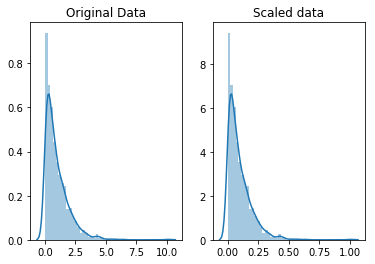

In [121]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# min-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Notice that the *shape* of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

___
## Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

> **[Normal distribution:](https://en.wikipedia.org/wiki/Normal_distribution)** Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method were  using to normalize here is called the [Box-Cox Transformation](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation). Let's take a quick peek at what normalizing some data looks like:

Text(0.5, 1.0, 'Normalized data')

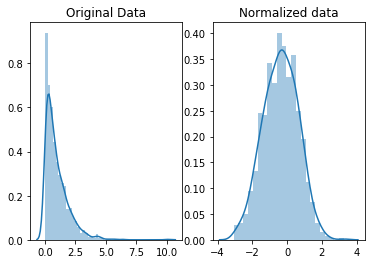

In [146]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data) # data for boxcox must be positive

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1]) # boxcox returns 2D array and the transformed series is stored as the 
#first object in the array
ax[1].set_title("Normalized data")

Notice that the *shape* of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve"). 

___
## Your turn!

For the following example, decide whether scaling or normalization makes more sense. 

* You want to build a linear regression model to predict someone's grades given how much time they spend on various activities during a normal school week.  You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying and others study for four or more hours every day. Should you scale or normalize this variable? 
>* **Answer**: Normalisation
* You're still working on your grades study, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you scale or normalize these variables?
>* **Answer**: Scaling

# Practice scaling
___

To practice scaling and normalization, we're going to be using a dataset of Kickstarter campaigns. (Kickstarter is a website where people can ask people to invest in various projects and concept products.)

Let's start by scaling the goals of each campaign, which is how much money they were asking for.

Text(0.5, 1.0, 'Scaled data')

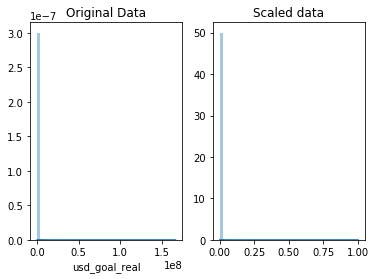

In [136]:
# select the usd_goal_real column
usd_goal = kickstarters_2017.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

You can see that scaling changed the scales of the plots dramatically (but not the shape of the data: it looks like most campaigns have small goals but a few have very large ones)

Text(0.5, 1.0, 'Scaled Data')

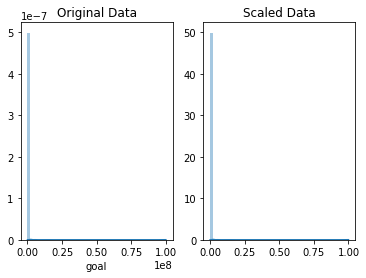

In [139]:
# Your turn! 
goal = kickstarters_2017.goal

scaled_goal_data = minmax_scaling(goal,columns=0)
fig,ax= plt.subplots(1,2)
sns.distplot(goal,ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_goal_data,ax=ax[1])
ax[1].set_title("Scaled Data")
# We just scaled the "usd_goal_real" column. What about the "goal" column?


# Practice normalization
___

Ok, now let's try practicing normalization. We're going to normalize the amount of money pledged to each campaign.

Text(0.5, 1.0, 'Normalized data')

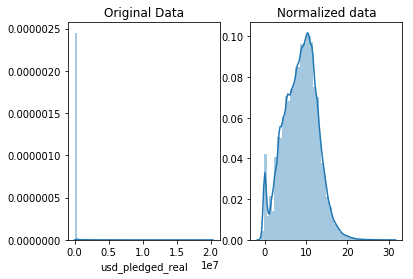

In [140]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

It's not perfect (it looks like a lot pledges got very few pledges) but it is much closer to normal!

Text(0.5, 1.0, 'Normalized Data')

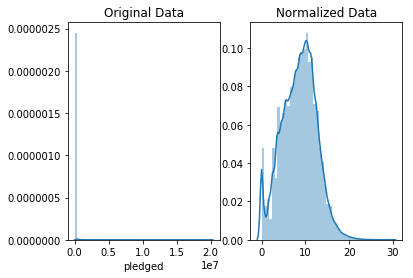

In [145]:
# Your turn! 
# We looked as the usd_pledged_real column. What about the "pledged" column? Does it have the same info?
pledged = kickstarters_2017.pledged.loc[kickstarters_2017.pledged > 0]
pledged_normalized = stats.boxcox(pledged)[0]

fig,ax = plt.subplots(1,2)
sns.distplot(pledged,ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(pledged_normalized,ax=ax[1])
ax[1].set_title('Normalized Data')

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Normalized Data')

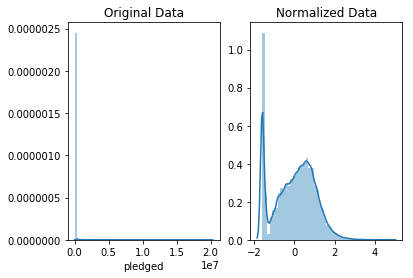

In [159]:
# if we would like to do the transformation for negative values as well we would use Yeo-Johnson Transformation

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson') # if not mentioned then the transformation is yeo-johnson by default
fit = pt.fit(np.array(kickstarters_2017.pledged).reshape((-1, 1))) # we have to reshape the array because the fit command 
# requires a 2d array i.e. has a column and several rows; the first integer represents row and second represents column
# for a single variable we have to i.e. np.reshape(-1,1) 
pledged_normalized = pt.transform(np.array(kickstarters_2017.pledged).reshape((-1, 1)))

fig,ax = plt.subplots(1,2)
sns.distplot(pledged,ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(pledged_normalized,ax=ax[1])
ax[1].set_title('Normalized Data')

And that's it for today! If you have any questions, be sure to post them in the comments below or [on the forums](https://www.kaggle.com/questions-and-answers). 

Remember that your notebook is private by default, and in order to share it with other people or ask for help with it, you'll need to make it public. First, you'll need to save a version of your notebook that shows your current work by hitting the "Commit & Run" button. (Your work is saved automatically, but versioning your work lets you go back and look at what it was like at the point you saved it. It also lets you share a nice compiled notebook instead of just the raw code.) Then, once your notebook is finished running, you can go to the Settings tab in the panel to the left (you may have to expand it by hitting the [<] button next to the "Commit & Run" button) and setting the "Visibility" dropdown to "Public".

# More practice!
___

Try finding a new dataset and pretend you're preparing to preform a [regression analysis](https://www.kaggle.com/rtatman/the-5-day-regression-challenge). ([These datasets are a good start!](https://www.kaggle.com/rtatman/datasets-for-regression-analysis)) Pick three or four variables and decide if you need to normalize or scale any of them and, if you think you should, practice applying the correct technique.

# Day 3
___
Welcome to day 3 of the 5-Day Data Challenge! Today, we're going to work with dates. To get started, click the blue "Fork Notebook" button in the upper, right hand corner. This will create a private copy of this notebook that you can edit and play with. Once you're finished with the exercises, you can choose to make your notebook public to share with others. :)

> **Your turn!** As we work through this notebook, you'll see some notebook cells (a block of either code or text) that has "Your Turn!" written in it. These are exercises for you to do to help cement your understanding of the concepts we're talking about. Once you've written the code to answer a specific question, you can run the code by clicking inside the cell (box with code in it) with the code you want to run and then hit CTRL + ENTER (CMD + ENTER on a Mac). You can also click in a cell and then click on the right "play" arrow to the left of the code. If you want to run all the code in your notebook, you can use the double, "fast forward" arrows at the bottom of the notebook editor.

Here's what we're going to do today:

* [Get our environment set up](#Get-our-environment-set-up)
* [Check the data type of our date column](#Check-the-data-type-of-our-date-column)
* [Convert our date columns to datetime](#Convert-our-date-columns-to-datetime)
* [Select just the day of the month from our column](#Select-just-the-day-of-the-month-from-our-column)
* [Plot the day of the month to check the date parsing](#Plot-the-day-of-the-month-to-the-date-parsing)

Let's get started!

# Get our environment set up
________

The first thing we'll need to do is load in the libraries and datasets we'll be using. For today, we'll be working with two datasets: one containing information on earthquakes that occured between 1965 and 2016, and another that contains information on landslides that occured between 2007 and 2016.

> **Important!** Make sure you run this cell yourself or the rest of your code won't work!

In [167]:
# modules we'll use
import pandas as pd, numpy as np, seaborn as sns, datetime


# read in our data
earthquakes = pd.read_csv("D:\Courses\Kaggle Data Cleaning\earthquake-database\database.csv")
landslides = pd.read_csv("D:\Courses\Kaggle Data Cleaning\landslide-events\catalog.csv")
volcanoes = pd.read_csv(r"D:\Courses\Kaggle Data Cleaning\volcanic-eruptions\database.csv")

# set seed for reproducibility
np.random.seed(0)

Now we're ready to look at some dates! (If you like, you can take this opportunity to take a look at some of the data.)

# Check the data type of our date column
___

For this part of the challenge, I'll be working with the `date` column from the `landslides` dataframe. The very first thing I'm going to do is take a peek at the first few rows to make sure it actually looks like it contains dates.

In [168]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Yep, those are dates! But just because I, a human, can tell that these are dates doesn't mean that Python knows that they're dates. Notice that the at the bottom of the output of `head()`, you can see that it says that the data type of this  column is "object". 

> Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it. 

If you check the pandas dtype documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), you'll notice that there's also a specific `datetime64` dtypes. Because the dtype of our column is `object` rather than `datetime64`, we can tell that Python doesn't know that this column contains dates.

We can also look at just the dtype of your column without printing the first few rows if we like:

In [169]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

In [171]:
# Your turn! Check the data type of the Date column in the earthquakes dataframe
# (note the capital 'D' in date!)
(earthquakes.Date.dtype)

dtype('O')

# Convert our date columns to datetime
___

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it *is* recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

We can use pandas to format our dates with a guide called as ["strftime directive", which you can find more information on at this link](http://strftime.org/). The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are [lots of possible parts of a date](http://strftime.org/), but the most common are `%d` for day, `%m` for month, `%y` for a two-digit year and `%Y` for a four digit year.

Some examples:

 * 1/17/07 has the format "%m/%d/%y"
 * 17-1-2007 has the format "%d-%m-%Y"
 
 Looking back up at the head of the `date` column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates: 

In [172]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

Now when I check the first few rows of the new column, I can see that the dtype is `datetime64`. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [173]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Now that our dates are parsed correctly, we can interact with them in useful ways.

___
* **What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

* **Why don't you always use `infer_datetime_format = True?`** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.
____

In [179]:
# Your turn! Create a new column, date_parsed, in the earthquakes
# dataset that has correctly parsed dates in it. (Don't forget to 
# double-check that the dtype is correct!)
earthquakes['date_parsed'] = pd.to_datetime(earthquakes.Date,format='%m/%d/%Y',infer_datetime_format=True)
earthquakes.date_parsed.head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: Date, dtype: datetime64[ns]

# Select just the day of the month from our column
___

"Ok, Rachael," you may be saying at this point, "This messing around with data types is fine, I guess, but what's the *point*?" To answer your question, let's try to get information on the day of the month that a landslide occured on from the original "date" column, which has an "object" dtype: 

In [181]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

We got an error! The important part to look at here is the part at the very end that says `AttributeError: Can only use .dt accessor with datetimelike values`. We're getting this error because the dt.day() function doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, because they haven't been parsed we can't interact with them in a useful way.

Luckily, we have a column that we parsed earlier , and that lets us get the day of the month out no problem:

In [182]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day

In [183]:
# Your turn! get the day of the month from the date_parsed column
day_of_month_earthquakes = earthquakes.date_parsed.dt.day

# Plot the day of the month to check the date parsing
___

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense. 

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

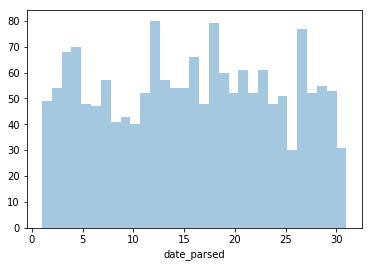

In [184]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

Yep, it looks like we did parse our dates correctly & this graph makes good sense to me. Why don't you take a turn checking the dates you parsed earlier?

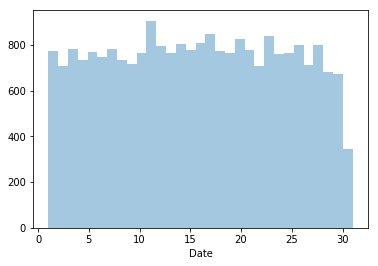

In [185]:
# Your turn! Plot the days of the month from your
# earthquake dataset and make sure they make sense.
day_of_month_earthquakes = day_of_month_earthquakes.dropna()
sns.distplot(day_of_month_earthquakes,kde=False,bins=31)

And that's it for today! If you have any questions, be sure to post them in the comments below or [on the forums](https://www.kaggle.com/questions-and-answers). 

Remember that your notebook is private by default, and in order to share it with other people or ask for help with it, you'll need to make it public. First, you'll need to save a version of your notebook that shows your current work by hitting the "Commit & Run" button. (Your work is saved automatically, but versioning your work lets you go back and look at what it was like at the point you saved it. It also lets you share a nice compiled notebook instead of just the raw code.) Then, once your notebook is finished running, you can go to the Settings tab in the panel to the left (you may have to expand it by hitting the [<] button next to the "Commit & Run" button) and setting the "Visibility" dropdown to "Public".

# More practice!
___

If you're interested in graphing time series, [check out this Learn tutorial](https://www.kaggle.com/residentmario/time-series-plotting-optional).

You can also look into passing columns that you know have dates in them  the `parse_dates` argument in `read_csv`. (The documention [is here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).) Do note that this method can be very slow, but depending on your needs it may sometimes be handy to use.

For an extra challenge, you can try try parsing the column `Last Known Eruption` from the `volcanoes` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [187]:
volcanoes['Last Known Eruption'].sample(20)

1471     1962 CE
617      1996 CE
305       950 CE
1199     1720 CE
1256     Unknown
217      Unknown
435      2015 CE
343      Unknown
1282     Unknown
1234     2009 CE
1092     1875 CE
1033     Unknown
912      Unknown
548      1857 CE
1315    2300 BCE
292      Unknown
211      Unknown
1321     1960 CE
1336     Unknown
385      2000 CE
Name: Last Known Eruption, dtype: object

In [190]:
volcanoes['Last Known Eruption'] = volcanoes['Last Known Eruption'].apply(lambda x: np.nan if x=='Unknown' else x)
volcanoes['Last Known Eruption Year'] = (volcanoes['Last Known Eruption'].
                                         apply(lambda x: np.nan if pd.isnull(x) else str(x).split(' ')[0] ))
volcanoes['Last Known Eruption BCE/CE'] = (volcanoes['Last Known Eruption'].
                                           apply(lambda x: np.nan if pd.isnull(x) else str(x).split(' ')[1]))

In [192]:
volcanoes.head(10)

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Last Known Eruption Year,Last Known Eruption BCE/CE
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km),8300,BCE
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),4040,BCE
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,NaN,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km),NaN,NaN
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),3600,BCE
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km),1282,CE
5,211003,Vulsini,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,104 BCE,42.600,11.930,800,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),104,BCE
6,211004,Colli Alban,Italy,Mediterranean and Western Asia,Caldera,Evidence Uncertain,NaN,41.730,12.700,949,Foidite,Subduction Zone / Continental Crust (>25 km),NaN,NaN
7,211010,Campi Flegrei,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,1538 CE,40.827,14.139,458,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),1538,CE
8,211020,Vesuvius,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,1944 CE,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction Zone / Continental Crust (>25 km),1944,CE
9,211030,Ischia,Italy,Mediterranean and Western Asia,Complex,Eruption Observed,1302 CE,40.730,13.897,789,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),1302,CE


### Plotting Time Series

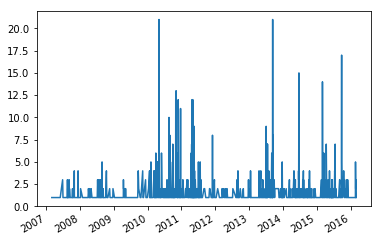

In [194]:
# creates a histogram of all dates
landslides['date_parsed'].value_counts().sort_values().plot.line()

As this plot is by day it doesn't give us a clear indication in which year the most number of landslides occur. However we can `resample` the data by year then it will give us a clearer picture.

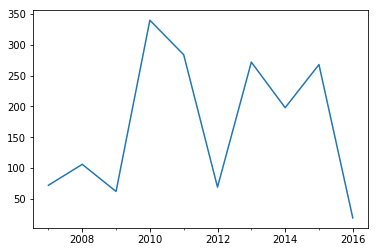

In [195]:
# resampling the data by year and plotting the same
landslides['date_parsed'].value_counts().resample('Y').sum().plot.line()

Now it's clear that around 2010 we had the highest number of landslides.

In [198]:
# reading in stock data and visualising the data for Apple
stocks = pd.read_csv(r'D:\Courses\Kaggle Data Cleaning\nyse\prices.csv',parse_dates=['date'] )
stocks = stocks[stocks['symbol']=='AAPL'].set_index('date')
stocks.head(10)

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0
2010-01-07,AAPL,211.750000,210.580000,209.050005,212.000006,119282800.0
2010-01-08,AAPL,210.299994,211.980005,209.060005,212.000006,111902700.0
2010-01-11,AAPL,212.799997,210.110003,208.450005,213.000002,115557400.0
2010-01-12,AAPL,209.189995,207.720001,206.419998,209.769995,148614900.0
2010-01-13,AAPL,207.870005,210.650002,204.099998,210.929995,151473000.0
2010-01-14,AAPL,210.110003,209.430000,209.020004,210.459997,108223500.0


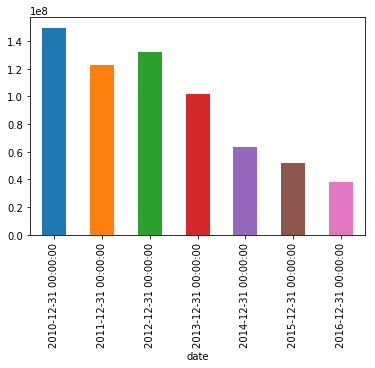

In [200]:
# plotting volume traded on a yearly basis
stocks['volume'].resample('Y').mean().plot.bar()

#### Lag Plot

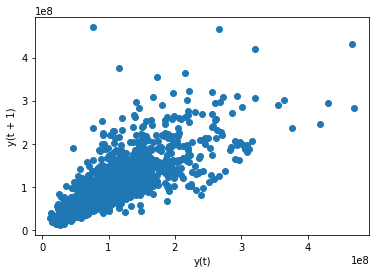

In [203]:
from pandas.plotting import lag_plot
lag_plot(stocks['volume']) # this for the entire period but if you want to know the lag for the last 250 days then 
# lag_plot(stocks['volume'].tail(250))

Here we notice that majority of the data points are between 0 to 2 lags indicating that there is a correlation between *t*, *t+1* and *t+2*. Time series also exhibits **periodicity** and lag plots are a way to check this kind of periodicity. Here the volume on a particular time *t* is being compared to the time *t-1* and time *t-1* is being compared to the time *t-2* and so on and so forth. 

#### Autocorrelation Plot

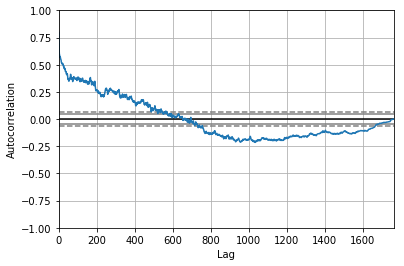

In [205]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(stocks['volume'])

Periodicity can further be checked with autocorrelation plot. The graph above shows that as time passes the correlations between *t* and *t-1* weakens. The traded volume at *t-365*(year) and *t* has increasingly low correlation. 

# Day 4

___
Welcome to day 4 of the 5-Day Data Challenge! Today, we're going to be working with different character encodings. To get started, click the blue "Fork Notebook" button in the upper, right hand corner. This will create a private copy of this notebook that you can edit and play with. Once you're finished with the exercises, you can choose to make your notebook public to share with others. :)

> **Your turn!** As we work through this notebook, you'll see some notebook cells (a block of either code or text) that has "Your Turn!" written in it. These are exercises for you to do to help cement your understanding of the concepts we're talking about. Once you've written the code to answer a specific question, you can run the code by clicking inside the cell (box with code in it) with the code you want to run and then hit CTRL + ENTER (CMD + ENTER on a Mac). You can also click in a cell and then click on the right "play" arrow to the left of the code. If you want to run all the code in your notebook, you can use the double, "fast forward" arrows at the bottom of the notebook editor.

Here's what we're going to do today:

* [Get our environment set up](#Get-our-environment-set-up)
* [What are encodings?](#What-are-encodings?)
* [Reading in files with encoding problems](#Reading-in-files-with-encoding-problems)
* [Saving your files with UTF-8 encoding](#Saving-your-files-with-UTF-8-encoding)

Let's get started!

# Get our environment set up
________

The first thing we'll need to do is load in the libraries we'll be using. Not our datasets, though: we'll get to those later!

> **Important!** Make sure you run this cell yourself or the rest of your code won't work!

In [206]:
# modules we'll use
import pandas as pd, numpy as np, chardet


# set seed for reproducibility
np.random.seed(0)

Now we're ready to work with some character encodings! (If you like, you can add a code cell here and take this opportunity to take a look at some of the data.)

# What are encodings?
____

Character encodings are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi"). There are many different encodings, and if you tried to read in text with a different encoding than the one it was originally written in, you ended up with scrambled text called "mojibake" (said like mo-gee-bah-kay). Here's an example of mojibake:

æ–‡å—åŒ–ã??

You might also end up with a "unknown" characters. There are what gets printed when there's no mapping between a particular byte and a character in the encoding you're using to read your byte string in and they look like this:

����������

Character encoding mismatches are less common today than they used to be, but it's definitely still a problem. There are lots of different character encodings, but the main one you need to know is UTF-8.

> UTF-8 is **the** standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. It's when things aren't in UTF-8 that you run into trouble.

It was pretty hard to deal with encodings in Python 2, but thankfully in Python 3 it's a lot simpler. (Kaggle Kernels only use Python 3.) There are two main data types you'll encounter when working with text in Python 3. One is is the string, which is what text is by default.

In [207]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

The other data is the [bytes](https://docs.python.org/3.1/library/functions.html#bytes) data type, which is a sequence of integers. You can convert a string into bytes by specifying which encoding it's in:

In [208]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

If you look at a bytes object, you'll see that it has a b in front of it, and then maybe some text after. That's because bytes are printed out as if they were characters encoded in ASCII. (ASCII is an older character encoding that doesn't really work for writing any language other than English.) Here you can see that our euro symbol  has been replaced with some mojibake that looks like "\xe2\x82\xac" when it's printed as if it were an ASCII string.

In [209]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

When we convert our bytes back to a string with the correct encoding, we can see that our text is all there correctly, which is great! :)

In [210]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


However, when we try to use a different encoding to map our bytes into a string,, we get an error. This is because the encoding we're trying to use doesn't know what to do with the bytes we're trying to pass it. You need to tell Python the encoding that the byte string is actually supposed to be in.

> You can think of different encodings as different ways of recording music. You can record the same music on a CD, cassette tape or 8-track. While the music may sound more-or-less the same, you need to use the right equipment to play the music from each recording format. The correct decoder is like a cassette player or a cd player. If you try to play a cassette in a CD player, it just won't work. 

In [211]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

We can also run into trouble if we try to use the wrong encoding to map from a string to bytes. Like I said earlier, strings are UTF-8 by default in Python 3, so if we try to treat them like they were in another encoding we'll create problems. 

For example, if we try to convert a string to bytes for ascii using encode(), we can ask for the bytes to be what they would be if the text was in ASCII. Since our text isn't in ASCII, though, there will be some characters it can't handle. We can automatically replace the characters that ASCII can't handle. If we do that, however, any characters not in ASCII will just be replaced with the unknown character. Then, when we convert the bytes back to a string, the character will be replaced with the unknown character. The dangerous part about this is that there's not way to tell which character it *should* have been. That means we may have just made our data unusable!

In [212]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


This is bad and we want to avoid doing it! It's far better to convert all our text to UTF-8 as soon as we can and keep it in that encoding. The best time to convert non UTF-8 input into UTF-8  is when you read in files, which we'll talk about next.

First, however, try converting between bytes and strings with different encodings and see what happens. Notice what this does to your text. Would you want this to happen to data you were trying to analyze?

In [216]:
# Your turn! Try encoding and decoding different symbols to ASCII and
# see what happens. I'd recommend $, #, 你好 and नमस्ते but feel free to
# try other characters. What happens? When would this cause problems?
trial = '$$, #, 你好 नमस्ते'.encode('ascii', errors = 'replace')
print(trial.decode('ascii'))

$$, #, ?? ??????


In [218]:
trial = '$$, #, 你好 नमस्ते'.encode('utf-8', errors = 'replace')
print(trial.decode('utf-8'))

$$, #, 你好 नमस्ते


# Reading in files with encoding problems
___

Most files you'll encounter will probably be encoded with UTF-8. This is what Python expects by default, so most of the time you won't run into problems. However, sometimes you'll get an error like this: 

In [228]:
# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv('D:/Courses/Kaggle Data Cleaning/kickstarter-projects/ks-projects-201612.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

Notice that we get the same `UnicodeDecodeError` we got when we tried to decode UTF-8 bytes as if they were ASCII! This tells us that this file isn't actually UTF-8. We don't know what encoding it actually *is* though. One way to figure it out is to try and test a bunch of different character encodings and see if any of them work. A better way, though, is to use the chardet module to try and automatically guess what the right encoding is. It's not 100% guaranteed to be right, but it's usually faster than just trying to guess.

I'm going to just look at the first ten thousand bytes of this file. This is usually enough for a good guess about what the encoding is and is much faster than trying to look at the whole file. (Especially with a  large file this can be very slow.) Another reason to just look at the first part of the file is that  we can see by looking at the error message that the first problem is the 11th character. So we probably only need to look at the first little bit of the file to figure out what's going on.

In [231]:
# look at the first ten thousand bytes to guess the character encoding
with open('D:/Courses/Kaggle Data Cleaning/kickstarter-projects/ks-projects-201612.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000)) # here 'rb' specifies that the file should be read as a byte without any 
    # encoding 

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


So chardet is 73%  confidence that the right encoding is "Windows-1252". Let's see if that's correct:

In [232]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv('D:/Courses/Kaggle Data Cleaning/kickstarter-projects/ks-projects-201612.csv',
                               encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015 11:36,1000,8/11/2015 12:12,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013 00:20,45000,1/12/2013 00:20,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012 04:24,5000,3/17/2012 03:24,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015 01:00,19500,7/4/2015 08:35,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,4/1/2016 13:38,50000,2/26/2016 13:38,52375,successful,224,US,52375


Yep, looks like chardet was right! The file reads in with no problem  and when we look at the first few rows it seems to be be fine. 

> **What if the encoding chardet guesses isn't right?** Since chardet is basically just a fancy guesser, sometimes it will guess the wrong encoding. One thing you can try is looking at more or less of the file and seeing if you get a different result and then try that.

In [256]:
# Your Turn! Trying to read in this file gives you an error. Figure out
# what the correct encoding should be and read in the file. :)
with open("D:/Courses/Kaggle Data Cleaning/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv",'rb') as raw_data:
    guess_encoding = chardet.detect(raw_data.read(10000000)) # increase the bytes read if after chardet detection 
    # pd.read_csv returns an error. in this case if you read 10K bytes then the detection will be ascii however, if you 
    # read 10Million bytes then the encoding will be Windows-1252 as shown below
print(guess_encoding)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [258]:
police_killings = pd.read_csv('D:/Courses/Kaggle Data Cleaning/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv',
                             encoding = 'Windows-1252')
police_killings.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


Way to read a file if pandas returns an error. This way one can read any file.

In [249]:
with open('D:/Courses/Kaggle Data Cleaning/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv', 'rb') as raw_data:
    print(raw_data.read(9))

b'id,name,d'


# Saving your files with UTF-8 encoding
___

Finally, once you've gone through all the trouble of getting your file into UTF-8, you'll probably want to keep it that way. The easiest way to do that is to save your files with UTF-8 encoding. The good news is, since UTF-8 is the standard encoding in Python, when you save a file it will be saved as UTF-8 by default:

In [259]:
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("D:/Courses/Kaggle Data Cleaning/kickstarter-projects/ks-projects-201802-utf8.csv")

Pretty easy, huh? :)

> If you haven't saved a file in a kernel before, you need to hit the commit & run button and wait for your notebook to finish running first before you can see or access the file you've saved out. If you don't see it at first, wait a couple minutes and it should show up. The files you save will be in the directory "../output/", and you can download them from your notebook.

In [260]:
# Your turn! Save out a version of the police_killings dataset with UTF-8 encoding 
police_killings.to_csv('D:/Courses/Kaggle Data Cleaning/fatal-police-shootings-in-the-us/police_killings_utf8.csv')

And that's it for today! We didn't do quite as much coding, but  take my word for it: if you don't have the right tools, figuring out what encoding a file is in can be a huge time sink. If you have any questions, be sure to post them in the comments below or [on the forums](https://www.kaggle.com/questions-and-answers). 

Remember that your notebook is private by default, and in order to share it with other people or ask for help with it, you'll need to make it public. First, you'll need to save a version of your notebook that shows your current work by hitting the "Commit & Run" button. (Your work is saved automatically, but versioning your work lets you go back and look at what it was like at the point you saved it. It also lets you share a nice compiled notebook instead of just the raw code.) Then, once your notebook is finished running, you can go to the Settings tab in the panel to the left (you may have to expand it by hitting the [<] button next to the "Commit & Run" button) and setting the "Visibility" dropdown to "Public".

# More practice!
___

Check out [this dataset of files in different character encodings](https://www.kaggle.com/rtatman/character-encoding-examples). Can you read in all the files with their original encodings and them save them out as UTF-8 files?

If you have a file that's in UTF-8 but has just a couple of weird-looking characters in it, you can try out the [ftfy module](https://ftfy.readthedocs.io/en/latest/#) and see if it helps. 

#### FixTextForYou (FTFY) Module

This module not only fixes text but also repairs mojibake occured during decoding.

In [424]:
import ftfy
with open('D:\Courses\Kaggle Data Cleaning\character-encoding-examples/harpers_ASCII.txt', 'rb') as raw_data:
    fixed_file = ftfy.fix_file(raw_data)
    #for i in fixed_file:
        #print(text_file)
    trial_file = 'D:\Courses\Kaggle Data Cleaning\character-encoding-examples\harpers_ASCII_utf.txt'
    with open(trial_file,'w') as write_file:
        for i in fixed_file:
            write_file.write(str(i))
    




In [418]:

# try to read some text files and save them in utf-8
with open('D:/Courses/Kaggle Data Cleaning/character-encoding-examples/yan_BIG-5.txt','rb') as raw_data:
    guess_encoding = chardet.detect(raw_data.read(1000000000))
trial_file = 'D:/Courses/Kaggle Data Cleaning/character-encoding-examples/yan_BIG1-5.txt'
with open('D:/Courses/Kaggle Data Cleaning/character-encoding-examples/yan_BIG-5.txt','r'
          ,encoding='Big5') as temp_file:
    temp = temp_file.read()
with open(trial_file,'w') as write_file:
    try:
        write_file.write(temp)
    except:
        print('Can\'t write this encoding to a file!' )

      
    
#print(guess_encoding)
    #print(guess_encoding['encoding']) # prints only the encoding

Can't write this encoding to a file!


In [420]:
# try to read some text files and save them in utf-8
# there is a try except loop because for certain encodings windows cannot write the decoded file

from mlxtend.file_io import find_files

for file in find_files('.txt','D:\Courses\Kaggle Data Cleaning\character-encoding-examples'):
    try:
        with open(file,'rb') as raw_data:
            guess_encoding = chardet.detect(raw_data.read(100000000))
            #print(str(file).split(\\)[-1][:-4])
        trial_file = '\\'.join(str(file).split('\\')[:-1])+'\\'+str(file).split('\\')[-1][:-4] + '_utf_8.txt'
        with open(file,'r',encoding=guess_encoding['encoding']) as temp_file:
            temp = temp_file.read()
        with open(trial_file,'w') as write_file:
            write_file.write(temp)
    except:
        continue



 Below is an example of an encoding that python reads but windows cannot read/write.

In [423]:
with open('D:\Courses\Kaggle Data Cleaning\character-encoding-examples/shisei_UTF-8.txt','rb') as data:
    guess_encoding = chardet.detect(data.read(100000000))
    with open('D:\Courses\Kaggle Data Cleaning\character-encoding-examples/shisei_UTF-8.txt','r'
              ,encoding = guess_encoding['encoding']) as data:
        for i in data:
            print(i)

The Project Gutenberg EBook of Shisei, by Junichiro Tanizaki



This eBook is for the use of anyone anywhere at no cost and with

almost no restrictions whatsoever.  You may copy it, give it away or

re-use it under the terms of the Project Gutenberg License included

with this eBook or online at www.gutenberg.net





Title: Shisei



Author: Junichiro Tanizaki



Release Date: March 13, 2010 [EBook #31617]



Language: Japanese



Character set encoding: UTF-8



*** START OF THIS PROJECT GUTENBERG EBOOK SHISEI ***









Produced by Kaoru Tanaka









Title: 刺靑 (Shisei)

Author: 谷崎潤一郞 (Junichiro Tanizaki)

Language: Japanese

Character set encoding: UTF-16

Text preparation by Kaoru Tanaka



-------------------------------------------------------

Notes on the signs in the text



《...》 shows ruby (short runs of text alongside the base text to indicate pronunciation).

Eg. 其《そ》



｜ marks the start of a string of ruby-attached characters.

Eg. 十三｜年目《ねんめ》



［＃...］ explains the

　明《あ》くる日《ひ》の晚《ばん》は素晴《すば》らしい大雨《たいう》であつた。私《わたし》はすつかり服裝《ふくさう》を改《あらた》めて、對《つひ》の大島《おほしま》の上《うへ》にゴム引《びき》の外套《ぐわいたう》を纏《まと》ひ、ざぶん、ざぶんと、甲斐絹張《かひきば》りの洋傘《かうもり》に、瀧《たき》の如《ごと》く叩《たゝ》きつける雨《あめ》の中《なか》を戶外《おもて》へ出《で》た。新堀《しんぼり》の溝《どぶ》が往來《わうらい》一｜圓《ゑん》に溢《あふ》れてゐるので、私《わたし》は足袋《たび》を懷《ふところ》へ入《い》れたが、びしよびしよに濡《ぬ》れた素足《すあし》が、家列《やなみ》のランプに照《て》らされてぴかぴか光《ひか》つて居《ゐ》た。夥《おびたゞ》しい雨量《うりやう》が、天《てん》からざあざあと直瀉《ちよくしや》する喧囂《けんがう》の響《ひゞき》の中《なか》に、何《なに》も彼《か》も打《う》ち消《け》されて、不斷《ふだん》賑《にぎや》かな廣小路《ひろこうぢ》の通《とほ》りも大槪《たいがい》雨戶《あまど》を締《し》め切《き》り、二三｜人《にん》の臀端折《しりはしを》りの男《をとこ》が、敗走《はいそう》した兵士《へいし》のやうに駈《か》け出《だ》して行《ゆ》く。電車《でんしや》が時々《とき／″＼》レールの上《うへ》に溜《た》まつた水《みづ》をほどばしらせて通《とほ》る外《ほか》は、ところどころの電柱《でんちう》や廣吿《くわうこく》のあかりが、濛々《もう／＼》たる雨《あめ》の空中《くうちう》をぼんやり照《て》らしてゐるばかりであつた。

　外套《ぐわいたう》から、手首《てくび》から、肘《ひぢ》の邊《へん》まで水《みづ》だらけになつて、漸《やうや》く雷門《かみなりもん》へ來《き》た私《わたし》は、雨中《うちう》にしよんぼり立《た》ち止《どま》りながら、アーク燈《とう》の光《ひかり》を透《す》かして、四邊《あたり》を見廻《みまは》したが、一《ひと》つも人影《ひとかげ》は見《み》えない。何處《どこ》かの暗《くら》い隅《すみ》に隱《かく》れて、何者《なにもの》かが私《わたし》の樣子《やうす》を窺《うかゞ》つてゐるのかも知《し》れない。かう思《おも》つて暫《しばら》く彳《たゝず》んで居《ゐ》ると、やがて吾妻橋《あづまばし》の方《はう》の暗闇《くらやみ》から、赤《あか》い提灯《

町家の隱居［＃「町家の隱居」に傍点］。はゝゝゝゝゝ。男《をとこ》も女《をんな》も、われがちに象《ざう》の後《あと》にくつ附《つ》いて行《い》つて了《しま》ひましたな。

老年の武士［＃「老年の武士」に傍点］。皆《みんな》、狂《きちがひ》のやうでござる。

町家の隱居［＃「町家の隱居」に傍点］。何《なん》だか灰色《はひいろ》の馬鹿《ばか》に巨《おほ》きな獸《けもの》でございましたな。

老年の武士［＃「老年の武士」に傍点］。圖拔《ずぬ》けて大《おほ》きいばかりで、拙者《せつしや》などにはえたいが［＃「えたい」に傍点］判《わか》らん。

町家の隱居［＃「町家の隱居」に傍点］。もう半藏御門《はんざうごもん》の所《ところ》まで參《まゐ》つたやうです。

老年の武士［＃「老年の武士」に傍点］。緩《のろ》いやうでも大《おほ》きいだけに案外《あんぐわい》步行《あし》は早《はや》いと見《み》える。

町家の隱居［＃「町家の隱居」に傍点］。神武天皇《じんむてんわう》が象《ざう》にお挽《ひ》かれなさると云《い》ふのも不思議《ふしぎ》な因緣《いんねん》でございますな。

老年の武士［＃「老年の武士」に傍点］。やつぱり牛《うし》に挽《ひ》かせた方《はう》が、うつりが好《よ》いやうぢや。

町家の隱居［＃「町家の隱居」に傍点］。それ、半藏御門《はんざうごもん》の方《はう》を御覽《ごらん》なさい。象《ざう》の體《からだ》が御門《ごもん》を一｜杯《ぱい》に塞《ふさ》いで了《しま》ひました。

老年の武士［＃「老年の武士」に傍点］。成《な》る程《ほど》――はてな、首《くび》を半分《はんぶん》御門《ごもん》へ突込《つゝこ》んだまま後《あと》へも先《さき》へも動《うご》かなくなつたやうぢや。

町家の隱居［＃「町家の隱居」に傍点］。多勢《おほぜい》寄《よ》つて蝟集《たか》つて大騷《おほさわ》ぎをして居《を》りますな。

老年の武士［＃「老年の武士」に傍点］。小《ち》ひさな門《もん》へ、大《おほ》きな獸《けもの》を入《い》れやうとするのは若《わか》い者《もの》の無鐵砲《むてつぱう》ぢや。

町家の隱居［＃「町家の隱居」に傍点］。左樣《さやう》でございますな。

［＃ここで字下げ終わり］

［＃ここから３字下げ］

　兩人《りやうにん》顏《かほ》を見合《みあは》せ、暫《しばら》く默《もく》したるまま下手《


work, you must comply either with the requirements of paragraphs 1.E.1

through 1.E.7 or obtain permission for the use of the work and the

Project Gutenberg-tm trademark as set forth in paragraphs 1.E.8 or

1.E.9.



1.E.3.  If an individual Project Gutenberg-tm electronic work is posted

with the permission of the copyright holder, your use and distribution

must comply with both paragraphs 1.E.1 through 1.E.7 and any additional

terms imposed by the copyright holder.  Additional terms will be linked

to the Project Gutenberg-tm License for all works posted with the

permission of the copyright holder found at the beginning of this work.



1.E.4.  Do not unlink or detach or remove the full Project Gutenberg-tm

License terms from this work, or any files containing a part of this

work or any other work associated with Project Gutenberg-tm.



1.E.5.  Do not copy, display, perform, distribute or redistribute this

electronic work, or any part of this electronic work, without

promin

# Day 5

___

Welcome to day 5 of the 5-Day Data Challenge! (Can you believe it's already been five days??) Today, we're going to learn how to clean up inconsistent text entries. To get started, click the blue "Fork Notebook" button in the upper, right hand corner. This will create a private copy of this notebook that you can edit and play with. Once you're finished with the exercises, you can choose to make your notebook public to share with others. :)

> **Your turn!** As we work through this notebook, you'll see some notebook cells (a block of either code or text) that has "Your Turn!" written in it. These are exercises for you to do to help cement your understanding of the concepts we're talking about. Once you've written the code to answer a specific question, you can run the code by clicking inside the cell (box with code in it) with the code you want to run and then hit CTRL + ENTER (CMD + ENTER on a Mac). You can also click in a cell and then click on the right "play" arrow to the left of the code. If you want to run all the code in your notebook, you can use the double, "fast forward" arrows at the bottom of the notebook editor.

Here's what we're going to do today:

* [Get our environment set up](#Get-our-environment-set-up)
* [Do some preliminary text pre-processing](#Do-some-preliminary-text-pre-processing)
* [Use fuzzy matching to correct inconsistent data entry](#Use-fuzzy-matching-to-correct-inconsistent-data-entry)


Let's get started!

# Get our environment set up
________

The first thing we'll need to do is load in the libraries we'll be using. Not our datasets, though: we'll get to those later!

> **Important!** Make sure you run this cell yourself or the rest of your code won't work!

In [6]:
# modules we'll use
import pandas as pd, numpy as np, chardet


# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process


# set seed for reproducibility
np.random.seed(0)

When I tried to read in the `PakistanSuicideAttacks Ver 11 (30-November-2017).csv`file the first time, I got a character encoding error, so I'm going to quickly check out what the encoding should be...

In [2]:
# look at the first ten thousand bytes to guess the character encoding
with open("D:\Courses\Kaggle Data Cleaning\pakistansuicideattacks/PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


And then read it in with the correct encoding. (If this look unfamiliar to you, check out [yesterday's challenge](https://www.kaggle.com/rtatman/data-cleaning-challenge-character-encodings/).) 

In [3]:
# read in our dat
suicide_attacks = pd.read_csv("D:\Courses\Kaggle Data Cleaning\pakistansuicideattacks/PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 
                              encoding='Windows-1252')

Now we're ready to get started! You can, as always, take a moment here to look at the data and get familiar with it. :)


# Do some preliminary text pre-processing
___

For this exercise, I'm interested in cleaning up the "City" column to make sure there's no data entry inconsistencies in it. We could go through and check each row by hand, of course, and hand-correct inconsistencies when we find them. There's a more efficient way to do this though!

In [4]:
# get all the unique values in the 'City' column
cities = suicide_attacks['City'].unique()

# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D. I Khan',
       'D.G Khan', 'D.G Khan ', 'D.I Khan', 'D.I Khan ', 'Dara Adam Khel',
       'Dara Adam khel', 'Fateh Jang', 'Ghallanai, Mohmand Agency ',
       'Gujrat', 'Hangu', 'Haripur', 'Hayatabad', 'Islamabad',
       'Islamabad ', 'Jacobabad', 'KURRAM AGENCY', 'Karachi', 'Karachi ',
       'Karak', 'Khanewal', 'Khuzdar', 'Khyber Agency', 'Khyber Agency ',
       'Kohat', 'Kohat ', 'Kuram Agency ', 'Lahore', 'Lahore ',
       'Lakki Marwat', 'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN',
       'Malakand ', 'Mansehra', 'Mardan', 'Mohmand Agency',
       'Mohmand Agency ', 'Mohmand agency', 'Mosal Kor, Mohmand Agency',
       'Multan', 'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town',

Just looking at this, I can see some problems due to inconsistent data entry: 'Lahore' and 'Lahore ', for example, or 'Lakki Marwat' and 'Lakki marwat'.

The first thing I'm going to do is make everything lower case (I can change it back at the end if I like) and remove any white spaces at the beginning and end of cells. Inconsistencies in capitalizations and trailing white spaces are very common in text data and you can fix a good 80% of your text data entry inconsistencies by doing this.

In [7]:
# convert to lower case
suicide_attacks['City'] = suicide_attacks['City'].str.lower()
# remove trailing white spaces
suicide_attacks['City'] = suicide_attacks['City'].str.strip()

Next we're going to tackle more difficult inconsistencies.

In [9]:
# Your turn! Take a look at all the unique values in the "Province" column. 
# Then convert the column to lowercase and remove any trailing white spaces
suicide_attacks.Province.unique()
suicide_attacks['Province'] = suicide_attacks['Province'].str.lower()
suicide_attacks['Province'] = suicide_attacks['Province'].str.strip()

# Use fuzzy matching to correct inconsistent data entry
___

Alright, let's take another look at the city column and see if there's any more data cleaning we need to do.

In [10]:
# get all the unique values in the 'City' column
cities = suicide_attacks['City'].unique()

# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'ghallanai, mohmand agency',
       'gujrat', 'hangu', 'haripur', 'hayatabad', 'islamabad',
       'jacobabad', 'karachi', 'karak', 'khanewal', 'khuzdar',
       'khyber agency', 'kohat', 'kuram agency', 'kurram agency',
       'lahore', 'lakki marwat', 'lasbela', 'lower dir', 'malakand',
       'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=

It does look like there are some remaining inconsistencies: 'd. i khan' and 'd.i khan' should probably be the same. (I [looked it up](https://en.wikipedia.org/wiki/List_of_most_populous_cities_in_Pakistan) and 'd.g khan' is a seperate city, so I shouldn't combine those.) 

I'm going to use the [fuzzywuzzy](https://github.com/seatgeek/fuzzywuzzy) package to help identify which string are closest to each other. This dataset is small enough that we could probably could correct errors by hand, but that approach doesn't scale well. (Would you want to correct a thousand errors by hand? What about ten thousand? Automating things as early as possible is generally a good idea. Plus, it’s fun! :)

> **Fuzzy matching:** The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. So "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" and one change away (replace "i" with "o"). You won't always be able to rely on fuzzy matching 100%, but it will usually end up saving you at least a little time.

Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings. Here, we're going to get the ten strings from our list of cities that have the closest distance to "d.i khan".

In [11]:
# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("d.i khan", cities, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('d. i khan', 100),
 ('d.i khan', 100),
 ('d.g khan', 88),
 ('khanewal', 50),
 ('sudhanoti', 47),
 ('hangu', 46),
 ('kohat', 46),
 ('dara adam khel', 45),
 ('chaman', 43),
 ('mardan', 43)]

We can see that two of the items in the cities are very close to "d.i khan": "d. i khan" and "d.i khan". We can also see the "d.g khan", which is a seperate city, has a ratio of 88. Since we don't want to replace "d.g khan" with "d.i khan", let's replace all rows in our City column that have a ratio of > 90 with "d. i khan". 

To do this, I'm going to write a function. (It's a good idea to write a general purpose function you can reuse if you think you might have to do a specific task more than once or twice. This keeps you from having to copy and paste code too often, which saves time and can help prevent mistakes.)

In [12]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

Now that we have a function, we can put it to the test!

In [13]:
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=suicide_attacks, column='City', string_to_match="d.i khan")

All done!


And now let's can check the unique values in our City column again and make sure we've tidied up d.i khan correctly.

In [16]:
# get all the unique values in the 'City' column
cities = suicide_attacks['City'].unique()

# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd.g khan', 'd.i khan', 'dara adam khel',
       'fateh jang', 'ghallanai, mohmand agency', 'gujrat', 'hangu',
       'haripur', 'hayatabad', 'islamabad', 'jacobabad', 'karachi',
       'karak', 'khanewal', 'khuzdar', 'khyber agency', 'kohat',
       'kuram agency', 'lahore', 'lakki marwat', 'lasbela', 'lower dir',
       'malakand', 'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)

Excellent! Now we only have "d.i khan" in our dataframe and we didn't have to change anything by hand. 

In [15]:
# Your turn! It looks like 'kuram agency' and 'kurram agency' should
# be the same city. Correct the dataframe so that they are.
replace_matches_in_column(suicide_attacks,'City','kuram agency',min_ratio=90)

All done!


And that's it for today! If you have any questions, be sure to post them in the comments below or [on the forums](https://www.kaggle.com/questions-and-answers). 

Remember that your notebook is private by default, and in order to share it with other people or ask for help with it, you'll need to make it public. First, you'll need to save a version of your notebook that shows your current work by hitting the "Commit & Run" button. (Your work is saved automatically, but versioning your work lets you go back and look at what it was like at the point you saved it. It also lets you share a nice compiled notebook instead of just the raw code.) Then, once your notebook is finished running, you can go to the Settings tab in the panel to the left (you may have to expand it by hitting the [<] button next to the "Commit & Run" button) and setting the "Visibility" dropdown to "Public".

# More practice!
___

Do any other columns in this dataframe have inconsistent data entry? If you can find any, try to tidy them up.

You can also try reading in the `PakistanSuicideAttacks Ver 6 (10-October-2017).csv` file from this dataset and tidying up any inconsistent columns in that data file.

In [22]:
with open('D:\Courses\Kaggle Data Cleaning\pakistansuicideattacks/PakistanSuicideAttacks Ver 6 (10-October-2017).csv','rb') as rawdata:
    guess_char = chardet.detect(rawdata.read(10000000))
    print(guess_char)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [35]:
suicide_attacks_ver1 = pd.read_csv('D:\Courses\Kaggle Data Cleaning\pakistansuicideattacks/PakistanSuicideAttacks Ver 6 (10-October-2017).csv',
                                  encoding='Windows-1252')
suicide_attacks_ver1.head(10)

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616
5,6,Thursday-December 25-2003,2 Thw al-Qi`dah 1424 A.H.,Holiday,Christmas/birthday of Quaid-e-Azam,1:40:00 PM/1:42:00 PM,Rawalpindi,33.6058,73.0437,Punjab,...,None,16.0,18.0,NaN,50,2.0,30kg in each car,1.District headquarters \nHospital,9.445,49.001
6,7,Saturday-February 28-2004,8 MuHarram 1425 A.H,Working Day,NaN,NaN,Rawalpindi,33.6058,73.0437,Punjab,...,shiite,NaN,1.0,3.0,4,1.0,NaN,NaN,15.275,59.495
7,8,Friday-May 7-2004,18 Raby` al-awal 1425 A.H,Working Day,NaN,1:20:00/1:17:00 PM,Karachi,24.9918,66.9911,Sindh,...,shiite,14.0,15.0,96.0,200,1.0,2kg,Civil hospital,33.860,92.948
8,9,Monday-May 31-2004,NaN,Working Day,NaN,evening,Karachi,24.9918,66.9911,Sindh,...,Shiite,16.0,18.0,NaN,35,1.0,NaN,Civil hospital-Liaquat National hospital-Jinna...,31.605,88.889
9,10,Thursday-June 3-2004,15 Raby` al-THaany 1425 A.H,Working Day,NaN,NaN,North waziristan,32.9746,70.1456,FATA,...,None,NaN,2.0,NaN,2,1.0,NaN,NaN,27.180,80.924


In [42]:
suicide_attacks_ver1['City'].unique()

array(['islamabad', 'karachi', 'quetta', 'rawalpindi', 'north waziristan',
       'kohat', 'attock', 'sialkot', 'lahore', 'swat', 'hangu', 'bannu',
       'lasbela', 'malakand', 'peshawar', 'd.i khan', 'lakki marwat',
       'tank', 'gujrat', 'charsadda', 'kuram agency', 'shangla',
       'bajaur agency', 'south waziristan', 'haripur', 'sargodha',
       'nowshehra', 'mohmand agency', 'dara adam khel', 'khyber agency',
       'mardan', 'bhakkar', 'orakzai agency', 'buner', 'd.g khan',
       'pishin', 'chakwal', 'upper dir', 'muzaffarabad', 'totalai',
       'multan', 'lower dir', 'sudhanoti', 'poonch', 'mansehra', 'karak',
       'swabi', 'shikarpur', 'sukkur', 'chaman', 'd. i khan', 'khanewal',
       'fateh jang', 'taftan', 'tirah valley', 'wagah', 'zhob', 'taunsa',
       'jacobabad', 'shabqadar-charsadda', 'khuzdar',
       'ghallanai, mohmand agency', 'hayatabad',
       'mosal kor, mohmand agency', 'sehwan town',
       'tangi, charsadda district'], dtype=object)

In [36]:
suicide_attacks_ver1['City'] = suicide_attacks_ver1['City'].str.lower()
suicide_attacks_ver1['City'] = suicide_attacks_ver1['City'].str.strip()
cities1 = suicide_attacks_ver1['City'].unique()
common_matches = fuzzywuzzy.process.extract('kuram agency',cities1,limit = 10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
common_matches



[('kuram agency', 100),
 ('kurram agency', 96),
 ('bajaur agency', 72),
 ('khyber agency', 72),
 ('orakzai agency', 69),
 ('mohmand agency', 62),
 ('mosal kor, mohmand agency', 61),
 ('ghallanai, mohmand agency', 50),
 ('gujrat', 44),
 ('d.g khan', 40)]

In [46]:
final_match = [match[0] for match in common_matches if match[1] >=90]
rows_with_match = suicide_attacks_ver1['City'].isin(final_match)
suicide_attacks_ver1.loc[rows_with_match,'City'] = 'kuram agency'
suicide_attacks_ver1['City'].unique()

array(['islamabad', 'karachi', 'quetta', 'rawalpindi', 'north waziristan',
       'kohat', 'attock', 'sialkot', 'lahore', 'swat', 'hangu', 'bannu',
       'lasbela', 'malakand', 'peshawar', 'd.i khan', 'lakki marwat',
       'tank', 'gujrat', 'charsadda', 'kuram agency', 'shangla',
       'bajaur agency', 'south waziristan', 'haripur', 'sargodha',
       'nowshehra', 'mohmand agency', 'dara adam khel', 'khyber agency',
       'mardan', 'bhakkar', 'orakzai agency', 'buner', 'd.g khan',
       'pishin', 'chakwal', 'upper dir', 'muzaffarabad', 'totalai',
       'multan', 'lower dir', 'sudhanoti', 'poonch', 'mansehra', 'karak',
       'swabi', 'shikarpur', 'sukkur', 'chaman', 'd. i khan', 'khanewal',
       'fateh jang', 'taftan', 'tirah valley', 'wagah', 'zhob', 'taunsa',
       'jacobabad', 'shabqadar-charsadda', 'khuzdar',
       'ghallanai, mohmand agency', 'hayatabad',
       'mosal kor, mohmand agency', 'sehwan town',
       'tangi, charsadda district'], dtype=object)

In [47]:
renamed_cities = suicide_attacks_ver1.City.unique()
renamed_cities.sort()
renamed_cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'ghallanai, mohmand agency',
       'gujrat', 'hangu', 'haripur', 'hayatabad', 'islamabad',
       'jacobabad', 'karachi', 'karak', 'khanewal', 'khuzdar',
       'khyber agency', 'kohat', 'kuram agency', 'lahore', 'lakki marwat',
       'lasbela', 'lower dir', 'malakand', 'mansehra', 'mardan',
       'mohmand agency', 'mosal kor, mohmand agency', 'multan',
       'muzaffarabad', 'north waziristan', 'nowshehra', 'orakzai agency',
       'peshawar', 'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)